In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/archive'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/archive\glaucoma.csv
/archive\ACRIMA\Images\Im001_ACRIMA.jpg
/archive\ACRIMA\Images\Im002_ACRIMA.jpg
/archive\ACRIMA\Images\Im003_ACRIMA.jpg
/archive\ACRIMA\Images\Im004_ACRIMA.jpg
/archive\ACRIMA\Images\Im005_ACRIMA.jpg
/archive\ACRIMA\Images\Im006_ACRIMA.jpg
/archive\ACRIMA\Images\Im007_ACRIMA.jpg
/archive\ACRIMA\Images\Im008_ACRIMA.jpg
/archive\ACRIMA\Images\Im009_ACRIMA.jpg
/archive\ACRIMA\Images\Im010_ACRIMA.jpg
/archive\ACRIMA\Images\Im011_ACRIMA.jpg
/archive\ACRIMA\Images\Im012_ACRIMA.jpg
/archive\ACRIMA\Images\Im013_ACRIMA.jpg
/archive\ACRIMA\Images\Im014_ACRIMA.jpg
/archive\ACRIMA\Images\Im015_ACRIMA.jpg
/archive\ACRIMA\Images\Im016_ACRIMA.jpg
/archive\ACRIMA\Images\Im017_ACRIMA.jpg
/archive\ACRIMA\Images\Im018_ACRIMA.jpg
/archive\ACRIMA\Images\Im019_ACRIMA.jpg
/archive\ACRIMA\Images\Im020_ACRIMA.jpg
/archive\ACRIMA\Images\Im021_ACRIMA.jpg
/archive\ACRIMA\Images\Im022_ACRIMA.jpg
/archive\ACRIMA\Images\Im023_ACRIMA.jpg
/archive\ACRIMA\Images\Im024_ACRIMA.jpg
/archive\ACRIMA\Im

In [3]:
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings(action='ignore')

In [7]:
import os

file_path = "/archive/ORIGA/ORIGA/Images"

# List all files in the directory
all_files = os.listdir(file_path)

jpg_files = [file for file in all_files if file.lower().endswith(".jpg")]
# Count the number of images
print("Number of images:", len(jpg_files))

Number of images: 650


In [9]:
file_path = "/archive/glaucoma.csv"
data = pd.read_csv(file_path)
print("Number of rows:", data.shape[0])
print("Number of columns:",data.shape[1])
print("Column names:", data.columns.tolist())

Number of rows: 650
Number of columns: 5
Column names: ['Filename', 'ExpCDR', 'Eye', 'Set', 'Glaucoma']


In [11]:
for column in data.columns:
    print(f"Unique values in '{column}':")
    print(data[column].unique(), "\n")

Unique values in 'Filename':
['001.jpg' '002.jpg' '003.jpg' '004.jpg' '005.jpg' '006.jpg' '007.jpg'
 '008.jpg' '009.jpg' '010.jpg' '011.jpg' '012.jpg' '013.jpg' '014.jpg'
 '015.jpg' '016.jpg' '017.jpg' '018.jpg' '019.jpg' '020.jpg' '021.jpg'
 '022.jpg' '023.jpg' '024.jpg' '025.jpg' '026.jpg' '027.jpg' '028.jpg'
 '029.jpg' '030.jpg' '031.jpg' '032.jpg' '033.jpg' '034.jpg' '035.jpg'
 '036.jpg' '037.jpg' '038.jpg' '039.jpg' '040.jpg' '041.jpg' '042.jpg'
 '043.jpg' '044.jpg' '045.jpg' '046.jpg' '047.jpg' '048.jpg' '049.jpg'
 '050.jpg' '051.jpg' '052.jpg' '053.jpg' '054.jpg' '055.jpg' '056.jpg'
 '057.jpg' '058.jpg' '059.jpg' '060.jpg' '061.jpg' '062.jpg' '063.jpg'
 '064.jpg' '065.jpg' '066.jpg' '067.jpg' '068.jpg' '069.jpg' '070.jpg'
 '071.jpg' '072.jpg' '073.jpg' '074.jpg' '075.jpg' '076.jpg' '077.jpg'
 '078.jpg' '079.jpg' '080.jpg' '081.jpg' '082.jpg' '083.jpg' '084.jpg'
 '085.jpg' '086.jpg' '087.jpg' '088.jpg' '089.jpg' '090.jpg' '091.jpg'
 '092.jpg' '093.jpg' '094.jpg' '095.jpg' '096.jp

In [13]:
display(data.info())
display(data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Filename  650 non-null    object 
 1   ExpCDR    650 non-null    float64
 2   Eye       650 non-null    object 
 3   Set       650 non-null    object 
 4   Glaucoma  650 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 25.5+ KB


None

Filename    0
ExpCDR      0
Eye         0
Set         0
Glaucoma    0
dtype: int64

Glaucoma distribution:
Glaucoma
0    482
1    168
Name: count, dtype: int64


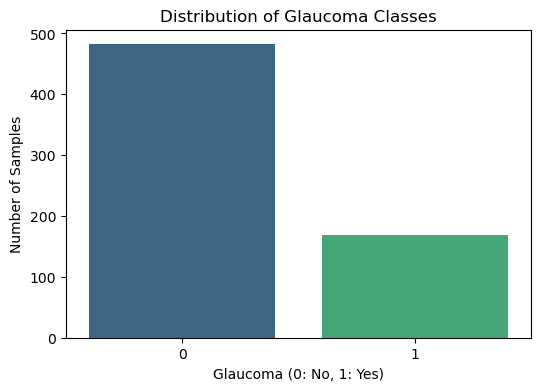

In [15]:
import seaborn as sns
# Count the occurrences of each class in the 'Glaucoma' column
glaucoma_counts = data['Glaucoma'].value_counts()

# Print the counts to check for imbalance
print("Glaucoma distribution:")
print(glaucoma_counts)

# Plotting the bar chart to visualize the imbalance
plt.figure(figsize=(6, 4))
sns.barplot(x=glaucoma_counts.index, y=glaucoma_counts.values, palette="viridis")
plt.title('Distribution of Glaucoma Classes')
plt.xlabel('Glaucoma (0: No, 1: Yes)')
plt.ylabel('Number of Samples')
plt.xticks(rotation=0)
plt.show()

In [19]:
# Paths
base_dir = "/archive/ORIGA/ORIGA"
csv_file_path = "/archive/glaucoma.csv"
image_dir = os.path.join(base_dir, "Images")
output_dir = "/archive/organized_data"

# Load the CSV file
data = pd.read_csv(csv_file_path)

# Create output directories for 'yes' and 'no'
yes_folder = os.path.join(output_dir, "yes")
no_folder = os.path.join(output_dir, "no")

# Subfolders for images and CSVs
yes_images_folder = os.path.join(yes_folder, "images")
yes_csv_folder = os.path.join(yes_folder, "csv")
no_images_folder = os.path.join(no_folder, "images")
no_csv_folder = os.path.join(no_folder, "csv")

# Create all necessary folders
os.makedirs(yes_images_folder, exist_ok=True)
os.makedirs(yes_csv_folder, exist_ok=True)
os.makedirs(no_images_folder, exist_ok=True)
os.makedirs(no_csv_folder, exist_ok=True)

# Separate data based on 'Glaucoma' values
yes_data = data[data["Glaucoma"] == 1]
no_data = data[data["Glaucoma"] == 0]

# Function to organize images and save CSVs
def organize_data(subset_data, images_folder, csv_folder):
    for _, row in subset_data.iterrows():
        filename = row["Filename"]
        src_path = os.path.join(image_dir, filename)
        dest_path = os.path.join(images_folder, filename)
        
        # Copy image
        if os.path.exists(src_path):
            shutil.copy(src_path, dest_path)
    
    # Save corresponding CSV in the 'csv' subfolder
    csv_path = os.path.join(csv_folder, "data.csv")
    subset_data.to_csv(csv_path, index=False)

# Organize data for 'yes' and 'no' classes
organize_data(yes_data, yes_images_folder, yes_csv_folder)
organize_data(no_data, no_images_folder, no_csv_folder)

print(f"Data organized into 'yes' and 'no' folders with separate subfolders for images and CSVs!")

Data organized into 'yes' and 'no' folders with separate subfolders for images and CSVs!


In [23]:
no_path = "/archive/organized_data/no/images"
yes_path = "/archive/organized_data/yes/images"
# List all files in the directory
nofiles = os.listdir(no_path)
yesfiles = os.listdir(yes_path)

no_files = [file for file in nofiles if file.lower().endswith(".jpg")]
yes_files = [file for file in yesfiles if file.lower().endswith(".jpg")]
# Count the number of images
print("Number of images in no directory:", len(no_files))
print("Number of images in yes directory:", len(yes_files))

Number of images in no directory: 482
Number of images in yes directory: 168


In [27]:
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths
yes_images_folder = "/archive/organized_data/yes/images"
output_dir = "/archive/organized_data/aug_yes"
aug_images_folder = os.path.join(output_dir, "images")
aug_csv_folder = os.path.join(output_dir, "csv")
yes_csv_path = "/archive/organized_data/yes/csv/data.csv"

# Load the CSV file
yes_data = pd.read_csv(yes_csv_path)

# Create output directories for augmented data
os.makedirs(aug_images_folder, exist_ok=True)
os.makedirs(aug_csv_folder, exist_ok=True)

# Define augmentation transformations
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode="nearest"
)
# List to store new rows for CSV
augmented_rows = []

# Augment Images and Create New Data
for _, row in yes_data.iterrows():
    filename = row["Filename"]
    src_path = os.path.join(yes_images_folder, filename)

    if os.path.exists(src_path):
        # Load the original image
        img = Image.open(src_path)
        img_array = np.expand_dims(np.array(img), axis=0)

        # Save the original image to the new folder
        new_filename = filename
        new_path = os.path.join(aug_images_folder, new_filename)
        img.save(new_path)

        # Add the original image row to augmented_rows
        new_row = row.copy()
        new_row["Filename"] = new_filename
        augmented_rows.append(new_row)

        # Generate 2 augmented images
        i = 1

        for batch in datagen.flow(img_array, batch_size=1):
            augmented_filename = f"{os.path.splitext(filename)[0]}_{i}.jpg"
            augmented_image_path = os.path.join(aug_images_folder, augmented_filename)

            # Save the augmented image
            augmented_img = Image.fromarray(batch[0].astype("uint8"))
            augmented_img.save(augmented_image_path)

            # Add new augmented image row to augmented_rows
            new_augmented_row = row.copy()
            new_augmented_row["Filename"] = augmented_filename
            augmented_rows.append(new_augmented_row)

            i += 1
            if i > 2:  # We need exactly 2 augmented images (total of 3 images: original + 2 augmented)
                break

# Save updated CSV with 3 images (original + 2 augmented) for each entry
augmented_data = pd.DataFrame(augmented_rows)
augmented_data.to_csv(os.path.join(aug_csv_folder, "data.csv"), index=False)

print(f"Augmented images saved to '{aug_images_folder}' and CSV updated at '{aug_csv_folder}/data.csv'.")

Augmented images saved to '/archive/organized_data/aug_yes\images' and CSV updated at '/archive/organized_data/aug_yes\csv/data.csv'.


In [29]:
file_path = "/archive/organized_data/aug_yes/images"

# List all files in the directory
all_files = os.listdir(file_path)

aug_files = [file for file in all_files if file.lower().endswith(".jpg")]
# Count the number of images
print("Number of total augmented images:", len(aug_files))

Number of total augmented images: 504


In [31]:
file_path = "/archive/organized_data/aug_yes/csv/data.csv"
df = pd.read_csv(file_path)
print("Number of rows:", df.shape[0])
print("Number of columns:",df.shape[1])
print("Column names:", df.columns.tolist())

Number of rows: 504
Number of columns: 5
Column names: ['Filename', 'ExpCDR', 'Eye', 'Set', 'Glaucoma']


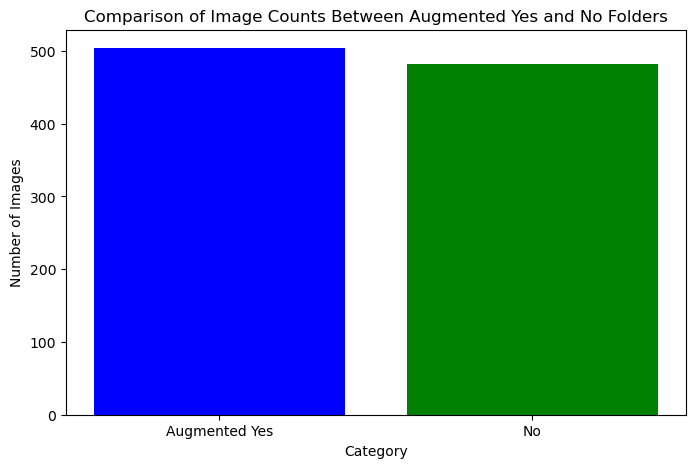

In [33]:
# Paths to the image folders
aug_yes_images_folder = "/archive/organized_data/aug_yes/images"
no_images_folder = "/archive/organized_data/no/images"

# Count the number of images in each folder
num_aug_yes_images = len([img for img in os.listdir(aug_yes_images_folder) if img.endswith(".jpg")])
num_no_images = len([img for img in os.listdir(no_images_folder) if img.endswith(".jpg")])

# Data for the bar chart
categories = ['Augmented Yes', 'No']
counts = [num_aug_yes_images, num_no_images]

# Plot the bar chart
plt.figure(figsize=(8, 5))
plt.bar(categories, counts, color=['blue', 'green'])
plt.title('Comparison of Image Counts Between Augmented Yes and No Folders')
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.grid(False)
plt.show()

In [5]:
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

In [19]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.utils import to_categorical

# Paths for aug_yes and no
aug_yes_csv_path = "/archive/organized_data/aug_yes/csv/data.csv"
aug_yes_images_folder = "/archive/organized_data/aug_yes/images"

no_csv_path = "/archive/organized_data/no/csv/data.csv"
no_images_folder = "/archive/organized_data/no/images"

# Load CSVs
data_yes = pd.read_csv(aug_yes_csv_path)
data_yes['label'] = 1  # Assign label 1 for "yes"

data_no = pd.read_csv(no_csv_path)
data_no['label'] = 0  # Assign label 0 for "no"

# Combine both classes and shuffle
data = pd.concat([data_yes, data_no], ignore_index=True)
data = data.sample(frac=1, random_state=42).reset_index(drop=True)
# Split data into train, validation, and test sets (70:15:15) while maintaining label balance
train_data, temp_data = train_test_split(data, test_size=0.3, stratify=data['label'], random_state=42)
valid_data, test_data = train_test_split(temp_data, test_size=0.5, stratify=temp_data['label'], random_state=42)

# Function to preprocess images and create data lists
def preprocess_and_load_data(data_subset, folder_paths):
    images = []
    labels = []

    for _, row in data_subset.iterrows():
        filename = row["Filename"]
        label = row["label"]
        # Determine the folder based on the label
        image_folder = folder_paths['yes'] if label == 1 else folder_paths['no']
        image_path = os.path.join(image_folder, filename)

        if os.path.exists(image_path):
            # Load the image and resize to (224, 224) for ResNet50
            img = load_img(image_path, target_size=(224, 224))
            img_array = img_to_array(img)
            img_preprocessed = preprocess_input(img_array)  # Preprocess for ResNet50
            
            images.append(img_preprocessed)
            labels.append(label)
    return np.array(images), np.array(labels)

# Define image folder paths for both labels
folder_paths = {
    "yes": aug_yes_images_folder,
    "no": no_images_folder
}

# Preprocess and load data for train, validation, and test sets
train_images, train_labels = preprocess_and_load_data(train_data, folder_paths)
valid_images, valid_labels = preprocess_and_load_data(valid_data, folder_paths)
test_images, test_labels = preprocess_and_load_data(test_data, folder_paths)

# One-hot encode the labels
num_classes = 2  # Glaucoma has two classes: 0 and 1
train_labels = to_categorical(train_labels, num_classes=num_classes)
valid_labels = to_categorical(valid_labels, num_classes=num_classes)
test_labels = to_categorical(test_labels, num_classes=num_classes)

# Output the shapes of the data
print(f"Train images shape: {train_images.shape}")
print(f"Train labels shape: {train_labels.shape}")
print(f"Validation images shape: {valid_images.shape}")
print(f"Validation labels shape: {valid_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")

# Print class distribution in each split
print("Class distribution in Train:", np.sum(train_labels, axis=0))
print("Class distribution in Validation:", np.sum(valid_labels, axis=0))
print("Class distribution in Test:", np.sum(test_labels, axis=0))

Train images shape: (690, 224, 224, 3)
Train labels shape: (690, 2)
Validation images shape: (148, 224, 224, 3)
Validation labels shape: (148, 2)
Test images shape: (148, 224, 224, 3)
Test labels shape: (148, 2)
Class distribution in Train: [337. 353.]
Class distribution in Validation: [72. 76.]
Class distribution in Test: [73. 75.]


In [21]:
# Define data augmentation for the training set
data_gen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Define ResNet50 model
def create_resnet50_model(input_shape, num_classes):
    # Load ResNet50 base model with pre-trained weights
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    
    # Freeze the base model layers for transfer learning
    for layer in base_model.layers:
        layer.trainable = False
    
    # Add custom classification layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    # Compile the model
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(learning_rate=1e-4), 
                  loss=tf.losses.CategoricalCrossentropy(), 
                  metrics=['accuracy'])
    return model

In [23]:
def lr_schedule(epoch, lr):
    # Example: Decrease learning rate by 10% every 5 epochs
    if epoch % 5 == 0 and epoch > 0:
        lr *= 0.9
    return float(lr)  # Ensure the return value is a float

# Create LearningRateScheduler callback with the corrected schedule function
learning_rate_scheduler = LearningRateScheduler(lr_schedule)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

In [25]:
# Model configuration
input_shape = (224, 224, 3)
num_classes = 2  # Yes and No classes
model = create_resnet50_model(input_shape, num_classes)

# Training the model
history = model.fit(
    data_gen.flow(train_images, train_labels, batch_size=32),
    epochs=50,
    validation_data=(valid_images, valid_labels),
    callbacks=[early_stopping, learning_rate_scheduler]
)

C:\Users\dell\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 119s 4s/step - accuracy: 0.5315 - loss: 0.9055 - val_accuracy: 0.7297 - val_loss: 0.5472 - learning_rate: 1.0000e-04
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 90s 4s/step - accuracy: 0.7106 - loss: 0.5537 - val_accuracy: 0.7432 - val_loss: 0.4994 - learning_rate: 1.0000e-04
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 89s 4s/step - accuracy: 0.7641 - loss: 0.5180 - val_accuracy: 0.7432 - val_loss: 0.5434 - learning_rate: 1.0000e-04
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 101s 5s/step - accuracy: 0.7706 - loss: 0.5055 - val_accuracy: 0.7297 - val_loss: 0.5397 - learning_rate: 1.0000e-04
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 104s 5s/step - accuracy: 0.7849 - loss: 0.4725 - val_accuracy: 0.7703 - val_loss: 0.4865 - learning_rate: 1.0000e-04
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 105s 5s/step - accuracy: 0.7918 - loss: 0.4639 - val_accuracy: 0.7568 - val_loss: 0.4966 - learning_rate: 9.0000e-05
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 83s 4s/step - accuracy: 0.7881 - l

In [27]:
# Create directory if it doesn't exist
save_dir = '/archive/'
os.makedirs(save_dir, exist_ok=True)

# Ensure file paths are valid
weights_path = './resnet50_model_weights.weights.h5'
model_path = './resnet50_model.h5'

# Debug paths
print(f"Saving weights to: {weights_path}")
print(f"Saving model to: {model_path}")

# Save weights and model
model.save_weights(weights_path)
model.save(model_path)

print("Model and weights saved successfully!")

Saving weights to: ./resnet50_model_weights.weights.h5
Saving model to: ./resnet50_model.h5


Model and weights saved successfully!


In [29]:
# Evaluate the model
results = model.evaluate(valid_images, valid_labels, batch_size=32)
print(f"Validation Loss: {results[0]}, Validation Accuracy: {results[1]}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.8061 - loss: 0.4397
Validation Loss: 0.4484156668186188, Validation Accuracy: 0.7972972989082336


In [41]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Debug: Check test shapes and content
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")
print(f"Test labels content: {test_labels[:10]}")  # Sample labels

# If test_labels is already in integer format, use it directly
test_labels_int = test_labels if len(test_labels.shape) == 1 else np.argmax(test_labels, axis=1)

# Load your trained model
model = tf.keras.models.load_model("/resnet50_model.h5")  # Path to your trained model

# Predict using the trained model
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)  # Convert predictions to class indices

# Calculate accuracy
accuracy = accuracy_score(test_labels_int, predicted_classes)
print(f"Manual Test Accuracy: {accuracy * 100:.2f}%")

# Classification Report
unique_classes = np.unique(test_labels_int)  # Get unique classes
target_names = [f"Class {cls}" for cls in unique_classes]  # Dynamically create target names

print("\nClassification Report:")
print(classification_report(test_labels_int, predicted_classes, target_names=target_names))

# Confusion Matrix
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(test_labels_int, predicted_classes)
print(conf_matrix)

#  print predictions for each image
for i, (true_label, pred_label) in enumerate(zip(test_labels_int, predicted_classes)):
    print(f"Image {i + 1}: True Label: {true_label}, Predicted Label: {pred_label}")

Test images shape: (148, 224, 224, 3)
Test labels shape: (148, 2)
Test labels content: [[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


5/5 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step
Manual Test Accuracy: 69.59%

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.64      0.89      0.74        73
     Class 1       0.83      0.51      0.63        75

    accuracy                           0.70       148
   macro avg       0.73      0.70      0.69       148
weighted avg       0.73      0.70      0.68       148


Confusion Matrix:
[[65  8]
 [37 38]]
Image 1: True Label: 1, Predicted Label: 1
Image 2: True Label: 1, Predicted Label: 0
Image 3: True Label: 0, Predicted Label: 0
Image 4: True Label: 1, Predicted Label: 0
Image 5: True Label: 1, Predicted Label: 1
Image 6: True Label: 0, Predicted Label: 0
Image 7: True Label: 0, Predicted Label: 0
Image 8: True Label: 0, Predicted Label: 0
Image 9: True Label: 1, Predicted Label: 1
Image 10: True Label: 1, Predicted Label: 1
Image 11: True Label: 1, Predicted Label: 0
Image 12: True Label: 0, Predicted Label: 1
Image 13: True Label: 0, P

In [50]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D

# Define VGG16 model
def create_vgg16_model(input_shape, num_classes):
    # Load the VGG16 base model with pre-trained weights
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    
    # Freeze the base model layers for transfer learning
    for layer in base_model.layers:
        layer.trainable = False
    
    # Add custom classification layers
    x = base_model.output
    x = Flatten()(x)  # Flatten the output of the base model
    x = Dense(256, activation='relu')(x)  # Fully connected layer
    x = Dropout(0.5)(x)  # Dropout for regularization
    predictions = Dense(num_classes, activation='softmax')(x)  # Final classification layer
    
    # Compile the model
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(learning_rate=1e-4), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

In [52]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
learning_rate_scheduler = LearningRateScheduler(lr_schedule)

In [54]:
# Model configuration
input_shape = (224, 224, 3)
num_classes = 2  # Yes and No classes
vgg16_model = create_vgg16_model(input_shape, num_classes)

# Train the VGG16 model
history_vgg16 = vgg16_model.fit(
    train_images,  # Training images
    train_labels,  # One-hot encoded training labels
    batch_size=32,
    epochs=25,
    validation_data=(valid_images, valid_labels),  # Validation data
    callbacks=[early_stopping, learning_rate_scheduler]
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Epoch 1/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 112s 5s/step - accuracy: 0.6689 - loss: 4.6659 - val_accuracy: 0.8176 - val_loss: 3.5794 - learning_rate: 1.0000e-04
Epoch 2/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 135s 6s/step - accuracy: 0.8236 - loss: 2.6011 - val_accuracy: 0.8243 - val_loss: 1.1666 - learning_rate: 1.0000e-04
Epoch 3/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 144s 7s/step - accuracy: 0.8588 - loss: 0.5744 - val_accuracy: 0.8311 - val_loss: 0.6783 - learning_rate: 1.0000e-04
Epoch 4/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 98s 4s/step - accuracy: 0.8511 - loss: 0.4631 - val_accuracy: 0.8378 - val_loss: 0.5838 - learning_rate: 1.0000e-04
Epoch 5/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 100s 5s/step - accuracy: 0.9234 - loss: 0.1900 - val_accuracy: 0.8311 - val_loss: 0.5831 - learning_rate: 1.0000e-04
Epoch 6/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 127s 6s/step - accuracy: 0.9357 - loss: 0.1548 - val_accuracy: 0.8108 - val_loss: 0.5762 - learning_rate: 9.0000e-05
Epoch 7/25
22/22 ━━━

In [56]:
# Save the VGG16 model and weights
vgg16_weights_path = './vgg16_model_weights.weights.h5'
vgg16_model_path = './vgg16_model.h5'

vgg16_model.save_weights(vgg16_weights_path)
vgg16_model.save(vgg16_model_path)

print("VGG16 model and weights saved successfully!")

VGG16 model and weights saved successfully!


Test images shape: (148, 224, 224, 3)
Test labels shape: (148, 2)
Sample test labels (one-hot): [[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


4/5 ━━━━━━━━━━━━━━━━━━━━ 3s 4s/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000025C95BE6FC0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step
VGG16 Test Accuracy: 81.08%

Classification Report (VGG16):
              precision    recall  f1-score   support

     Class 0       0.77      0.88      0.82        73
     Class 1       0.86      0.75      0.80        75

    accuracy                           0.81       148
   macro avg       0.82      0.81      0.81       148
weighted avg       0.82      0.81      0.81       148


Confusion Matrix (VGG16):
[[64  9]
 [19 56]]


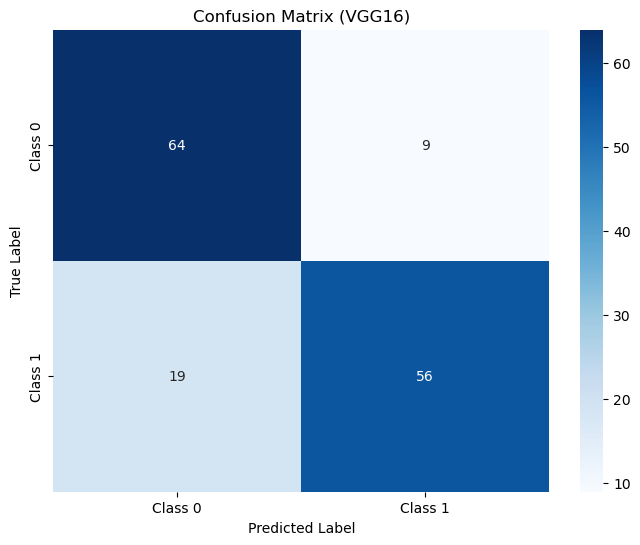

Image 1: True Label: 1, Predicted Label: 1
Image 2: True Label: 1, Predicted Label: 1
Image 3: True Label: 0, Predicted Label: 0
Image 4: True Label: 1, Predicted Label: 1
Image 5: True Label: 1, Predicted Label: 0
Image 6: True Label: 0, Predicted Label: 0
Image 7: True Label: 0, Predicted Label: 0
Image 8: True Label: 0, Predicted Label: 0
Image 9: True Label: 1, Predicted Label: 1
Image 10: True Label: 1, Predicted Label: 1
Image 11: True Label: 1, Predicted Label: 0
Image 12: True Label: 0, Predicted Label: 0
Image 13: True Label: 0, Predicted Label: 0
Image 14: True Label: 0, Predicted Label: 0
Image 15: True Label: 0, Predicted Label: 0
Image 16: True Label: 0, Predicted Label: 0
Image 17: True Label: 1, Predicted Label: 1
Image 18: True Label: 0, Predicted Label: 1
Image 19: True Label: 1, Predicted Label: 1
Image 20: True Label: 0, Predicted Label: 0
Image 21: True Label: 1, Predicted Label: 1
Image 22: True Label: 1, Predicted Label: 1
Image 23: True Label: 1, Predicted Label:

In [58]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import load_model

# Load the trained VGG16 model
vgg16_model = load_model('./vgg16_model.h5')  # Path to the saved VGG16 model

# Debug: Check test data shape and content
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")
print(f"Sample test labels (one-hot): {test_labels[:10]}")

# Convert one-hot encoded test labels to integer format
test_labels_int = test_labels if len(test_labels.shape) == 1 else np.argmax(test_labels, axis=1)

# Predict using the VGG16 model
vgg16_predictions = vgg16_model.predict(test_images)
vgg16_predicted_classes = np.argmax(vgg16_predictions, axis=1)  # Convert predictions to class indices

# Calculate accuracy
vgg16_test_accuracy = accuracy_score(test_labels_int, vgg16_predicted_classes)
print(f"VGG16 Test Accuracy: {vgg16_test_accuracy * 100:.2f}%")

# Generate classification report
print("\nClassification Report (VGG16):")
target_names = [f"Class {cls}" for cls in np.unique(test_labels_int)]  # Dynamically create target names
print(classification_report(test_labels_int, vgg16_predicted_classes, target_names=target_names))


# Generate confusion matrix
print("\nConfusion Matrix (VGG16):")
vgg16_conf_matrix = confusion_matrix(test_labels_int, vgg16_predicted_classes)
print(vgg16_conf_matrix)

# Optional: Visualize the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(vgg16_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.title("Confusion Matrix (VGG16)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Optionally: Print individual predictions for each test image
for i, (true_label, pred_label) in enumerate(zip(test_labels_int, vgg16_predicted_classes)):
    print(f"Image {i + 1}: True Label: {true_label}, Predicted Label: {pred_label}")